In [6]:
import pandas as pd
print(pd.__version__)


2.3.0


In [7]:
import pandas as pd
import random
from datetime import datetime, timedelta

# IPs simulados de possíveis atacantes
ips = [
    "192.168.1.1", "192.168.1.2", "203.0.113.5",
    "10.0.0.45", "172.16.0.3", "198.51.100.23",
    "192.0.2.12", "203.0.113.22", "203.0.113.5"
]

# Tipos de ataques fictícios
ataques = [
    "Tentativa de login inválido", "Port scan", "DDoS",
    "Upload malicioso", "SQL Injection", "XSS",
    "Tentativa de acesso root", "Brute force"
]

# Gerar 500 entradas de log
dados = []
for _ in range(500):
    ip = random.choice(ips)
    tipo_ataque = random.choice(ataques)
    data = datetime.now() - timedelta(minutes=random.randint(0, 10000))
    dados.append([ip, tipo_ataque, data.strftime('%Y-%m-%d %H:%M:%S')])

# Criar DataFrame e salvar em CSV
df_logs = pd.DataFrame(dados, columns=["ip", "tipo_ataque", "data_hora"])
df_logs.to_csv("logs_simulados.csv", index=False)

print("Arquivo 'logs_simulados.csv' criado com sucesso!")


Arquivo 'logs_simulados.csv' criado com sucesso!


In [9]:
import pandas as pd

df = pd.read_csv('logs_simulados.csv')
print(df.head())


            ip                  tipo_ataque            data_hora
0    10.0.0.45                  Brute force  2025-06-14 05:49:07
1  192.168.1.2     Tentativa de acesso root  2025-06-12 06:22:07
2  192.168.1.2             Upload malicioso  2025-06-12 19:41:07
3  192.168.1.1                         DDoS  2025-06-08 15:25:07
4  203.0.113.5  Tentativa de login inválido  2025-06-14 15:16:07


In [12]:
import pandas as pd

# Lê o arquivo CSV
df = pd.read_csv('logs_simulados.csv')

# Mostra as primeiras 5 linhas
df.head()


,ip,tipo_ataque,data_hora
0,10.0.0.45,Brute force,2025-06-14 05:49:07
1,192.168.1.2,Tentativa de acesso root,2025-06-12 06:22:07
2,192.168.1.2,Upload malicioso,2025-06-12 19:41:07
3,192.168.1.1,DDoS,2025-06-08 15:25:07
4,203.0.113.5,Tentativa de login inválido,2025-06-14 15:16:07


In [21]:
# Contagem de tipos de ataques
tipos_ataque = df['tipo_ataque'].value_counts()
print(tipos_ataque)

# Converter a coluna para datetime
df['data_hora'] = pd.to_datetime(df['data_hora'])

# Extrair só a data (sem hora)
df['data'] = df['data_hora'].dt.date

# Contar ataques por dia
ataques_por_dia = df['data'].value_counts().sort_index()
print(ataques_por_dia)



tipo_ataque
Brute force                    72
DDoS                           71
Port scan                      66
Tentativa de acesso root       63
SQL Injection                  63
Upload malicioso               62
XSS                            57
Tentativa de login inválido    46
Name: count, dtype: int64
data
2025-06-07    15
2025-06-08    71
2025-06-09    57
2025-06-10    81
2025-06-11    78
2025-06-12    72
2025-06-13    79
2025-06-14    47
Name: count, dtype: int64


In [27]:
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('logs_simulados.csv')

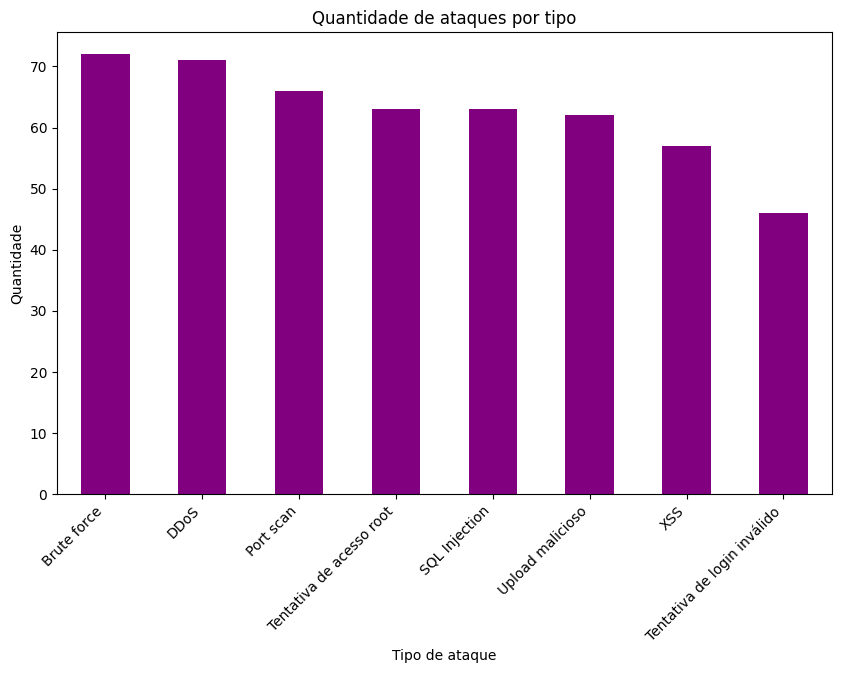

In [32]:
# Conta quantos ataques tem cada tipo
ataques_por_tipo = df['tipo_ataque'].value_counts()

# Plota o gráfico de barras
plt.figure(figsize=(10,6))
ataques_por_tipo.plot(kind='bar', color='purple')
plt.title('Quantidade de ataques por tipo')
plt.xlabel('Tipo de ataque')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')
plt.show()

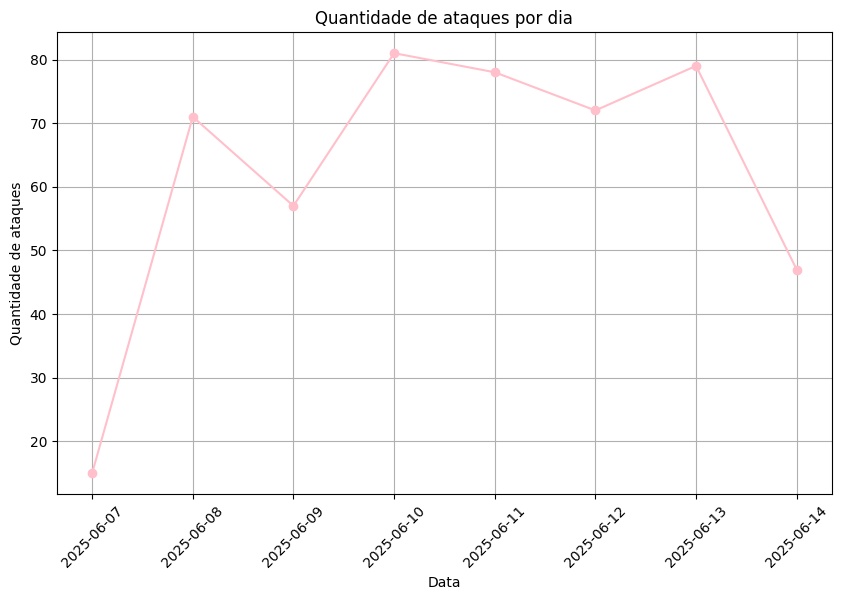

In [34]:
# Converte a coluna 'data_hora' para datetime
df['data_hora'] = pd.to_datetime(df['data_hora'])

#Cria uma nova coluna só com a data (sem hora)
df['data'] = df['data_hora'].dt.date

# Conta ataques por data
ataques_por_dia = df['data'].value_counts().sort_index()

# Plota gráfico de linha
plt.figure(figsize=(10,6))
ataques_por_dia.plot(kind='line', marker='o', color='pink')
plt.title('Quantidade de ataques por dia')
plt.xlabel('Data')
plt.ylabel('Quantidade de ataques')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [36]:
ataques_por_ip = df['ip'].value_counts()

# Mostrar os 10 IPs com mais ataques
print(ataques_por_ip.head(10))

ip
203.0.113.5      104
10.0.0.45         64
192.168.1.1       63
172.16.0.3        58
203.0.113.22      56
192.0.2.12        56
192.168.1.2       52
198.51.100.23     47
Name: count, dtype: int64


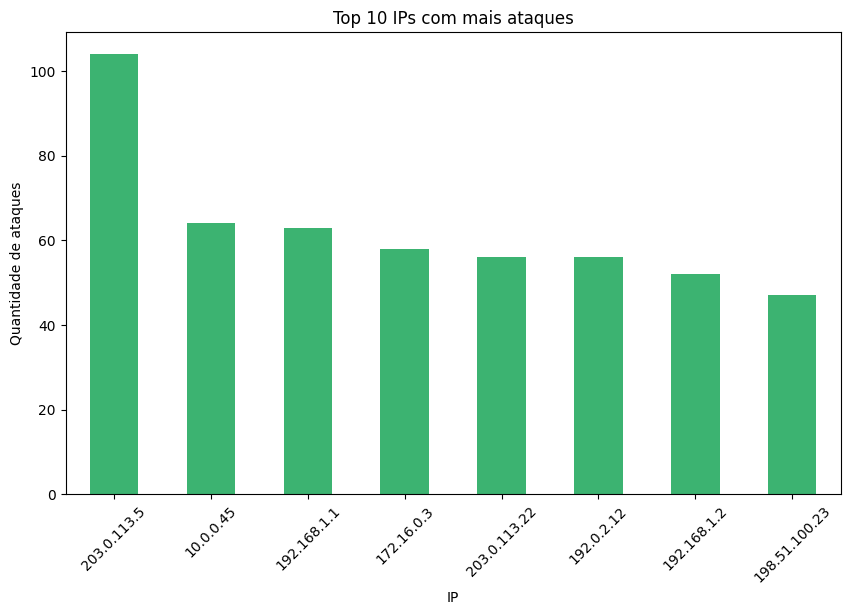

In [38]:
plt.figure(figsize=(10,6))
ataques_por_ip.head(10).plot(kind='bar', color='mediumseagreen')
plt.title('Top 10 IPs com mais ataques')
plt.xlabel('IP')
plt.ylabel('Quantidade de ataques')
plt.xticks(rotation=45)
plt.show()

In [11]:
import pandas as pd

df = pd.read_csv("logs_simulados.csv")
df['data_hora'] = pd.to_datetime(df['data_hora'])
df['data'] = df['data_hora'].dt.date

# Ver as primeiras linhas
print("🔎 Primeiros registros do arquivo:")
print(df.head(), "\n")

# Tipos de ataque únicos
print("📌 Tipos de ataque únicos:")
print(df['tipo_ataque'].value_counts(), "\n")

# Dias com mais ataques
print("📆 Ataques por dia:")
print(df['data'].value_counts().sort_index(), "\n")

# IPs que mais aparecem
print("🚨 IPs mais frequentes:")
print(df['ip'].value_counts().head(10))


🔎 Primeiros registros do arquivo:
            ip                  tipo_ataque           data_hora        data
0    10.0.0.45                  Brute force 2025-06-14 05:49:07  2025-06-14
1  192.168.1.2     Tentativa de acesso root 2025-06-12 06:22:07  2025-06-12
2  192.168.1.2             Upload malicioso 2025-06-12 19:41:07  2025-06-12
3  192.168.1.1                         DDoS 2025-06-08 15:25:07  2025-06-08
4  203.0.113.5  Tentativa de login inválido 2025-06-14 15:16:07  2025-06-14 

📌 Tipos de ataque únicos:
tipo_ataque
Brute force                    72
DDoS                           71
Port scan                      66
Tentativa de acesso root       63
SQL Injection                  63
Upload malicioso               62
XSS                            57
Tentativa de login inválido    46
Name: count, dtype: int64 

📆 Ataques por dia:
data
2025-06-07    15
2025-06-08    71
2025-06-09    57
2025-06-10    81
2025-06-11    78
2025-06-12    72
2025-06-13    79
2025-06-14    47
Name: coun

In [12]:
# Contar quantos ataques vieram de cada IP
ataques_por_ip = df['ip'].value_counts()

# Mostrar os 10 IPs com mais ataques
print("🔐 Top 10 IPs com mais tentativas de ataque:")
print(ataques_por_ip.head(10))

🔐 Top 10 IPs com mais tentativas de ataque:
ip
203.0.113.5      104
10.0.0.45         64
192.168.1.1       63
172.16.0.3        58
203.0.113.22      56
192.0.2.12        56
192.168.1.2       52
198.51.100.23     47
Name: count, dtype: int64


In [15]:
# Criar uma tabela cruzada entre IPs e tipos de ataque
ip_vs_ataque = pd.crosstab(df['ip'], df['tipo_ataque'])

# Mostrar os primeiros registros
ip_vs_ataque.head(10)


tipo_ataque,Brute force,DDoS,Port scan,SQL Injection,Tentativa de acesso root,Tentativa de login inválido,Upload malicioso,XSS
ip,,,,,,,,
10.0.0.45,10,7,10,6,7,9,7,8
172.16.0.3,8,9,6,7,8,6,7,7
192.0.2.12,8,7,5,6,9,8,8,5
192.168.1.1,3,9,6,5,10,7,11,12
192.168.1.2,6,10,11,6,5,1,5,8
198.51.100.23,11,6,5,8,5,4,7,1
203.0.113.22,8,9,11,4,4,2,10,8
203.0.113.5,18,14,12,21,15,9,7,8


In [19]:
# Extrair hora dos ataques
df['hora'] = df['data_hora'].dt.hour

# Contar quantos ataques ocorreram entre 0h e 6h
ataques_madrugada = df[(df['hora'] >= 0) & (df['hora'] < 6)]
qtde_madrugada = len(ataques_madrugada)

# Total de ataques
qtde_total = len(df)

# Porcentagem
porcentagem = (qtde_madrugada / qtde_total) * 100

print(f"🌙 Ataques entre 00h e 06h: {qtde_madrugada} ({porcentagem:.2f}% do total)")

🌙 Ataques entre 00h e 06h: 130 (26.00% do total)


In [21]:
# Criar uma nova coluna com data sem hora
df['data'] = df['data_hora'].dt.date

# Agrupar por IP e data
ataques_por_dia_ip = df.groupby(['ip', 'data']).size().reset_index(name='total_ataques')

# Filtrar onde os ataques foram maiores que 5
alertas = ataques_por_dia_ip[ataques_por_dia_ip['total_ataques'] > 5]

# Exibir alertas
print("🚨 ALERTAS DE IPs COM ATAQUES RECORRENTES NO MESMO DIA:")
print(alertas)


🚨 ALERTAS DE IPs COM ATAQUES RECORRENTES NO MESMO DIA:
               ip        data  total_ataques
0       10.0.0.45  2025-06-08             11
1       10.0.0.45  2025-06-09              9
2       10.0.0.45  2025-06-10             10
4       10.0.0.45  2025-06-12             10
5       10.0.0.45  2025-06-13             12
6       10.0.0.45  2025-06-14              7
8      172.16.0.3  2025-06-08              7
9      172.16.0.3  2025-06-09              7
10     172.16.0.3  2025-06-10             13
11     172.16.0.3  2025-06-11             10
12     172.16.0.3  2025-06-12              6
13     172.16.0.3  2025-06-13              9
17     192.0.2.12  2025-06-09              6
18     192.0.2.12  2025-06-10             10
19     192.0.2.12  2025-06-11              6
20     192.0.2.12  2025-06-12              7
21     192.0.2.12  2025-06-13             13
22     192.0.2.12  2025-06-14              8
24    192.168.1.1  2025-06-08              9
25    192.168.1.1  2025-06-09              7


In [24]:
!pip install seaborn


C:\Users\Na\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


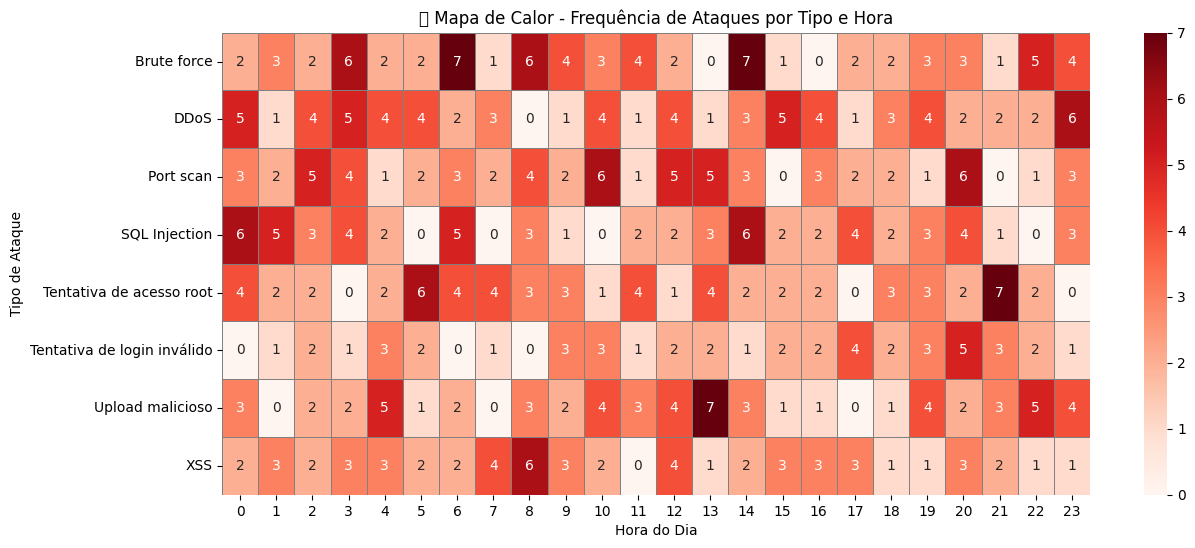

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tabela dinâmica: tipo de ataque x hora
tabela_calor = df.pivot_table(index='tipo_ataque', columns='hora', aggfunc='size', fill_value=0)

# Gráfico
plt.figure(figsize=(14, 6))
sns.heatmap(tabela_calor, cmap="Reds", linewidths=0.5, linecolor='gray', annot=True, fmt='d')
plt.title("🔥 Mapa de Calor - Frequência de Ataques por Tipo e Hora")
plt.xlabel("Hora do Dia")
plt.ylabel("Tipo de Ataque")
plt.show()


C:\Users\Na\AppData\Local\Temp\ipykernel_14588\1541293848.py:6: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Na\AppData\Local\Temp\ipykernel_14588\1541293848.py:7: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.savefig("naoa_calor_ataques.png", dpi=300)
C:\Users\Na\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


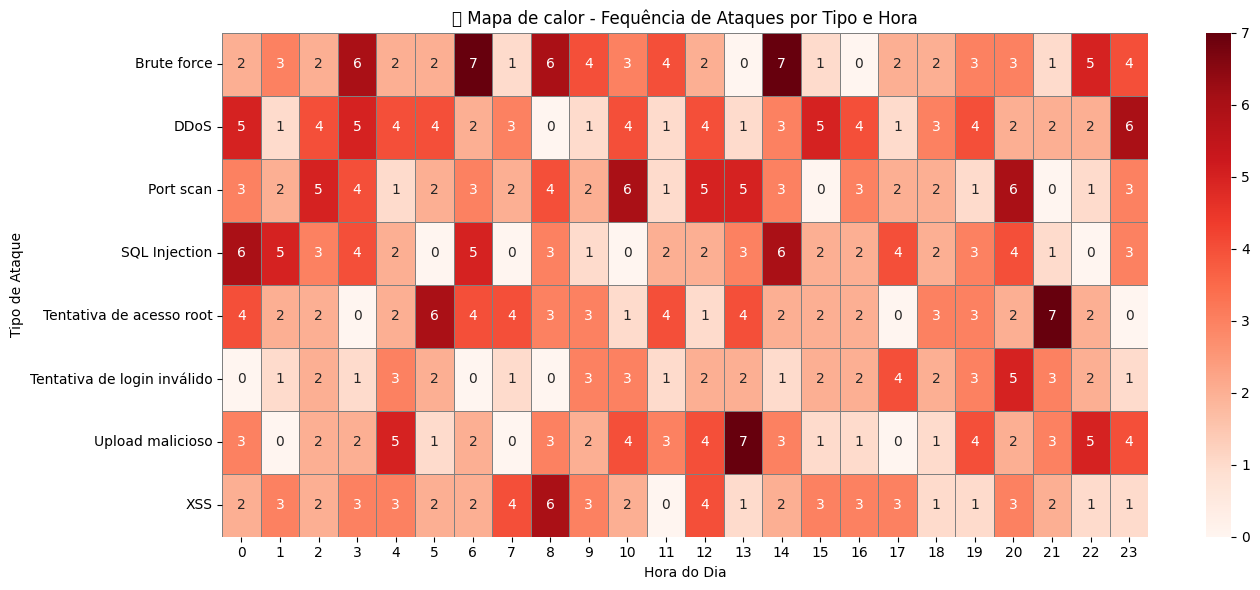

In [26]:
plt.figure(figsize=(14,6))
sns.heatmap(tabela_calor, cmap="Reds", linewidths=0.5, linecolor='gray', annot=True, fmt='d')
plt.title("🔥 Mapa de calor - Fequência de Ataques por Tipo e Hora")
plt.xlabel("Hora do Dia")
plt.ylabel("Tipo de Ataque")
plt.tight_layout()
plt.savefig("naoa_calor_ataques.png", dpi=300)
plt.show()